In [ ]:
import os
import joblib

# Create directories if they don't exist (in Colab environment)
os.makedirs('/content/models', exist_ok=True)
os.makedirs('/content/scalers', exist_ok=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have a dataframe `df` with columns ['date', 'Ozone', 'Latitude', 'Longitude', 'Temperature', 'Wind Speed', ...]
df= pd.read_csv('/content/April2023.csv')
df= pd.read_csv('/content/April2024.csv')
df= pd.read_csv('/content/August2023.csv')
df= pd.read_csv('/content/August2024.csv')
df= pd.read_csv('/content/December2022.csv')
df= pd.read_csv('/content/February2023.csv')
df= pd.read_csv('/content/February2024.csv')
df= pd.read_csv('/content/January2023.csv')
df= pd.read_csv('/content/January2024.csv')
df= pd.read_csv('/content/July2023.csv')
df= pd.read_csv('/content/July2024.csv')
df= pd.read_csv('/content/June2023.csv')
df= pd.read_csv('/content/June2024.csv')
df= pd.read_csv('/content/March2023.csv')
df= pd.read_csv('/content/March2024.csv')
df= pd.read_csv('/content/May2023.csv')
df= pd.read_csv('/content/May2024.csv')
df= pd.read_csv('/content/November2022.csv')
df= pd.read_csv('/content/November2023.csv')
df= pd.read_csv('/content/October2022.csv')
df= pd.read_csv('/content/October2023.csv')
df= pd.read_csv('/content/September2022.csv')
df= pd.read_csv('/content/September2023.csv')
df= pd.read_csv('/content/September2024.csv')
df= pd.read_csv('/content/October2024.csv')
df= pd.read_csv('/content/November2024.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort the dataset by date to maintain the temporal order
#df = df.sort_values(by='date').reset_index(drop=True)
df = df[['date', 'AQI', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()


,date,AQI,Latitude,Longitude
0,2024-11-01 00:00:00,57.960,32.0301,71.87921
1,2024-11-01 01:00:00,60.245,32.0301,71.87921
2,2024-11-01 02:00:00,64.395,32.0301,71.87921
3,2024-11-01 03:00:00,67.475,32.0301,71.87921
4,2024-11-01 04:00:00,67.800,32.0301,71.87921


In [ ]:
print(df.isnull().sum())
df = df.dropna()

date         0
AQI          0
Latitude     0
Longitude    0
dtype: int64


In [ ]:
print(df.isnull().sum())
df = df.dropna()
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot the distribution of AQI before removing outliers
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)  # Subplot 1: Before removing outliers
# sns.boxplot(x=df['AQI'])
# plt.title('Before Removing Outliers')

# # Step 2: Remove Outliers (Already provided in your code)
# Q1 = df['AQI'].quantile(0.35)
# Q3 = df['AQI'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # # Remove outliers
# # df_filtered = df[(df['AQI'] >= lower_bound) & (df['AQI'] <= upper_bound)]
# cap_value = df['AQI'].quantile(0.9)
# df['AQI'] = np.where(df['AQI'] > cap_value, cap_value, df['AQI'])
# # Step 3: Plot After Removing Outliers
# plt.subplot(1, 2, 2)  # Subplot 2: After removing outliers
# sns.boxplot(x=df['AQI'])
# plt.title('After Removing Outliers')

# # Show the plots
# plt.tight_layout()
# plt.show()
#df=df_filtered

date         0
AQI          0
Latitude     0
Longitude    0
dtype: int64


In [ ]:
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape


(79200, 4)

In [ ]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

# Drop the 'date' column as it's no longer needed
#df = df.drop(columns=['date'])

# Check the updated dataframe
print(df.head())

                 date     AQI  Latitude  Longitude  month  day  hour  \
0 2024-11-01 00:00:00  57.960   32.0301   71.87921     11    1     0   
1 2024-11-01 01:00:00  60.245   32.0301   71.87921     11    1     1   
2 2024-11-01 02:00:00  64.395   32.0301   71.87921     11    1     2   
3 2024-11-01 03:00:00  67.475   32.0301   71.87921     11    1     3   
4 2024-11-01 04:00:00  67.800   32.0301   71.87921     11    1     4   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the features and target
features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'AQI'

# Split the data into training and testing sets randomly (80% training, 20% testing)
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first 5 rows of the scaled training data
print(X_train_scaled[:5])


(63360, 6) (15840, 6)
[[ 6.36899790e-02  7.39181226e-01  0.00000000e+00  1.26496807e+00
   6.91840976e-02  1.28029324e+00]
 [ 6.83551679e-01  5.84302945e-01  0.00000000e+00  3.15496497e-01
  -1.66268477e+00 -1.24695728e-01]
 [ 6.77335314e-01  1.94653579e+00  0.00000000e+00 -6.33975077e-01
   1.22376334e+00 -1.52968470e+00]
 [ 1.29852637e-01 -1.15860445e+00  0.00000000e+00  3.15496497e-01
   1.22376334e+00 -1.24695728e-01]
 [ 1.29831312e+00  1.59993769e+00  0.00000000e+00 -9.94028005e-04
   1.22376334e+00 -5.93025386e-01]]


In [ ]:
# Slice the test set for 60 days × 24 hours (if your data has hourly granularity for 60 days)
test_set_size = 60 * 24  # 60 days, 24 hours each
total_data_points = len(y)  # Total number of observations

# Check the percentage of test data
percentage_of_test_data = (test_set_size / total_data_points) * 100
print(f"Percentage of test data: {percentage_of_test_data:.2f}%")

# Assuming the test set needs to be sequential for 60 days
X_train_seq, X_test_seq = X.iloc[:-test_set_size], X.iloc[-test_set_size:]
y_train_seq, y_test_seq = y.iloc[:-test_set_size], y.iloc[-test_set_size:]

# Standardize these new sequential splits
scaler.fit(X_train_seq)
X_train_seq_scaled = scaler.transform(X_train_seq)
X_test_seq_scaled = scaler.transform(X_test_seq)

# Check the transformed data
print(X_train_seq_scaled[:5])  # First 5 rows of training data
print(X_test_seq_scaled[:5])  # First 5 rows of test data


Percentage of test data: 1.82%
[[ 0.79148163 -0.25059783  0.         -1.57979841 -1.66132477  0.3407267 ]
 [ 0.79148163 -0.25059783  0.         -1.57979841 -1.51686175  0.3407267 ]
 [ 0.79148163 -0.25059783  0.         -1.57979841 -1.37239873  0.3407267 ]
 [ 0.79148163 -0.25059783  0.         -1.57979841 -1.2279357   0.3407267 ]
 [ 0.79148163 -0.25059783  0.         -1.57979841 -1.08347268  0.3407267 ]]
[[ 1.12963901  1.02659979  0.          0.31771664 -1.66132477 -0.12744739]
 [ 1.12963901  1.02659979  0.          0.31771664 -1.51686175 -0.12744739]
 [ 1.12963901  1.02659979  0.          0.31771664 -1.37239873 -0.12744739]
 [ 1.12963901  1.02659979  0.          0.31771664 -1.2279357  -0.12744739]
 [ 1.12963901  1.02659979  0.          0.31771664 -1.08347268 -0.12744739]]


In [ ]:
# X_train_scaled=X_train
# X_test_scaled=X_test


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 15.373028720513194
MAE: 10.20752326409594
R-squared: 0.9417278740652262


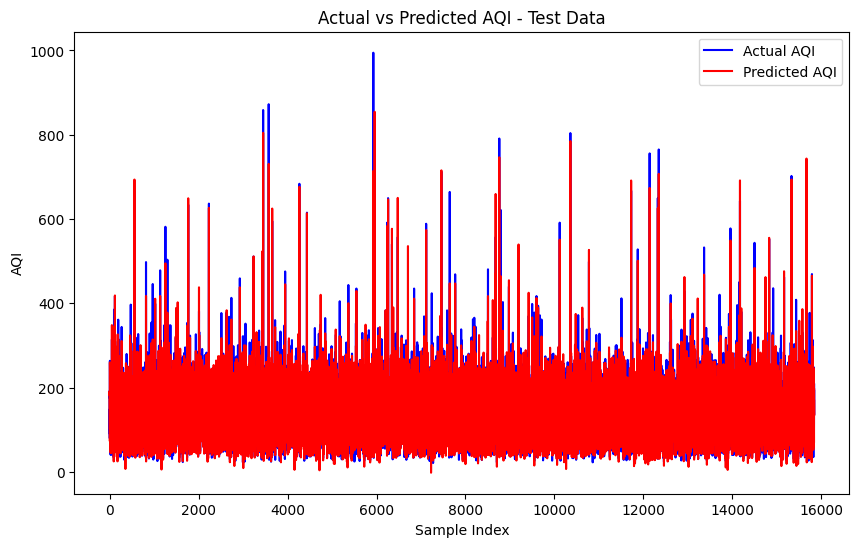

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted AQI', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted AQI - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [ ]:
model_path = os.path.join('/content/models', 'AQI_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_AQI.pkl')
joblib.dump(scaler, scaler_path)

['/content/scalers/scaler_AQI.pkl']

<ipython-input-13-e7d51bca2873>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=current_date, periods=24 * 90, freq='H')  # 2 months of hourly data


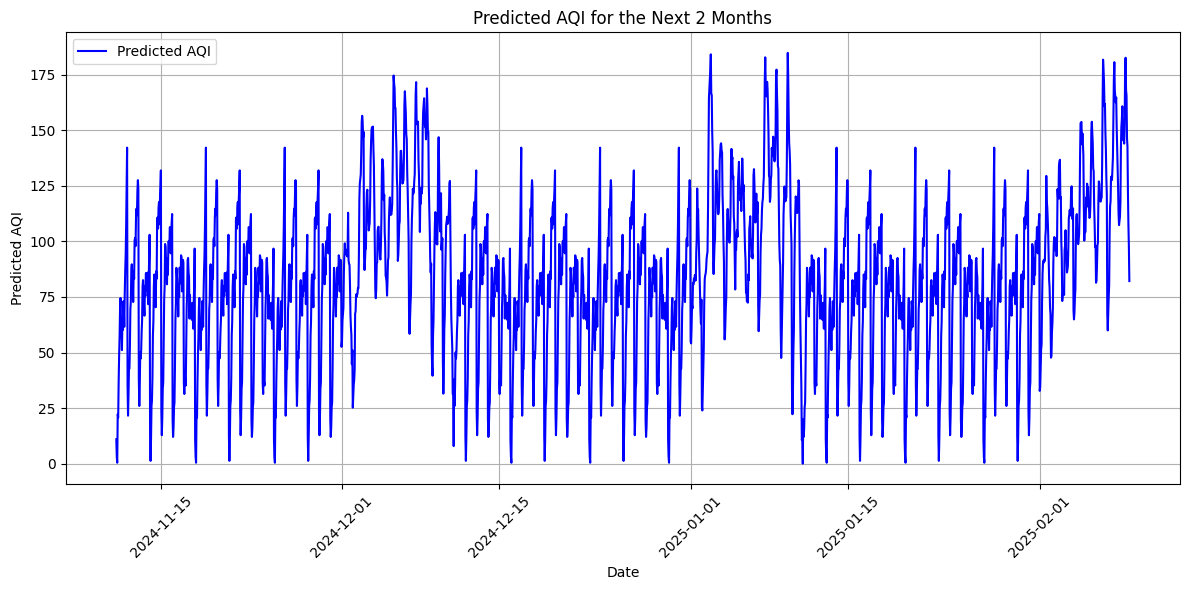

In [ ]:
import joblib
joblib.dump(model, 'AQI_model.pkl')
joblib.dump(scaler, 'scaler_AQI.pkl')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the best model and scaler
best_model = joblib.load('AQI_model.pkl')
minmax_scaler = joblib.load('scaler_AQI.pkl')  # Ensure this is the correct file name

# User inputs
latitude = 40  # Replace with actual latitude
longitude = 30  # Replace with actual longitude
current_date = '2024-11-11 00:00:00'  # Replace with the current date

# Convert the current date to a datetime object
current_date = pd.to_datetime(current_date)

# Create future date range for the next 2 months (hourly)
future_dates = pd.date_range(start=current_date, periods=24 * 60, freq='H')  # 2 months of hourly data

# Prepare the future data frame
future_data = pd.DataFrame({
    'date': future_dates,
    'Latitude': [latitude] * len(future_dates),
    'Longitude': [longitude] * len(future_dates),
})

# Extract time features
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day
future_data['hour'] = future_data['date'].dt.hour
future_data['day_of_week'] = future_data['date'].dt.dayofweek

# Select relevant features (matching the training data)
X_future = future_data[['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']]

# Scale the future data
X_future_scaled = minmax_scaler.transform(X_future)

# Make predictions for the next 2 months
future_predictions = best_model.predict(X_future_scaled)

# Handle negative AQI values
future_predictions = np.maximum(future_predictions, 0)  # Set negative values to 0

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'date': future_data['date'],
    'predicted_AQI': future_predictions
})

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['date'], predictions_df['predicted_AQI'], color='blue', label='Predicted AQI')
plt.title('Predicted AQI for the Next 2 Months')
plt.xlabel('Date')
plt.ylabel('Predicted AQI')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the best model and scaler
best_model = joblib.load('AQI_model.pkl')
minmax_scaler = joblib.load('scaler_AQI.pkl')

# Load the CSV file with locations (lon, lat, district_name)
locations_df = pd.read_csv('/content/location_smog.csv')  # Ensure your CSV file path is correct

# Create an empty DataFrame to store results
results = []

# Iterate through each location in the DataFrame
for index, row in locations_df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    district_name = row['District']

    # Create future date range for the next 60 days (hourly)
    future_dates = pd.date_range(start=pd.to_datetime('2024-11-10'), periods=90 * 24, freq='H')  # 60 days of hourly data

    # Prepare the future data frame
    future_data = pd.DataFrame({
        'date': future_dates,
        'Latitude': [latitude] * len(future_dates),
        'Longitude': [longitude] * len(future_dates),
    })

    # Extract time features
    future_data['month'] = future_data['date'].dt.month
    future_data['day'] = future_data['date'].dt.day
    future_data['hour'] = future_data['date'].dt.hour
    future_data['day_of_week'] = future_data['date'].dt.dayofweek

    # Select relevant features (matching the training data)
    X_future = future_data[['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']]

    # Scale the future data
    X_future_scaled = minmax_scaler.transform(X_future)

    # Make predictions for the next 60 days
    future_predictions = best_model.predict(X_future_scaled)

    # Handle negative AQI values
    future_predictions = np.maximum(future_predictions, 0)  # Set negative values to 0

    # Create a DataFrame for predictions
    predictions_df = pd.DataFrame({
        'date': future_data['date'],
        'predicted_AQI': future_predictions,
        'Latitude': latitude,
        'Longitude': longitude,
        'district_name': district_name
    })

    # Append the results to the results list
    results.append(predictions_df)

    # Plotting the predicted AQI
    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df['date'], predictions_df['predicted_AQI'], color='blue', label='Predicted AQI')
    plt.title(f'Predicted AQI for {district_name} for the Next 60 Days')
    plt.xlabel('Date')
    plt.ylabel('Predicted AQI')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'predicted_aqi_{district_name}.png')  # Save each plot as a PNG file
    plt.show()  # Show the plot

# Concatenate all results into a single DataFrame
final_results = pd.concat(results, ignore_index=True)

# Save the results to a CSV file
final_results.to_csv('predicted_aqi_60_days.csv', index=False)

# Print the final results DataFrame
print(final_results.head())


In [ ]:
print(final_results)
#save as csv
final_results.to_csv('predicted_aqi_60_days.csv', index=False)

                      date  predicted_AQI   Latitude  Longitude district_name
0      2024-11-10 00:00:00     220.691483  32.030100  71.879210       Khushab
1      2024-11-10 01:00:00     216.804214  32.030100  71.879210       Khushab
2      2024-11-10 02:00:00     219.577332  32.030100  71.879210       Khushab
3      2024-11-10 03:00:00     215.519348  32.030100  71.879210       Khushab
4      2024-11-10 04:00:00     213.484634  32.030100  71.879210       Khushab
...                    ...            ...        ...        ...           ...
647995 2025-02-07 19:00:00     169.627151  32.224554  71.322217      Mianwali
647996 2025-02-07 20:00:00     165.895920  32.224554  71.322217      Mianwali
647997 2025-02-07 21:00:00     160.424011  32.224554  71.322217      Mianwali
647998 2025-02-07 22:00:00     160.441544  32.224554  71.322217      Mianwali
647999 2025-02-07 23:00:00     159.354767  32.224554  71.322217      Mianwali

[648000 rows x 5 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the file to Google Drive
final_results.to_csv('/content/drive/MyDrive/predicted_aqi_60_days.csv', index=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.listdir('/content'))

['.config', 'predicted_aqi_Jhelum.png', 'drive', 'predicted_aqi_Narowal.png', 'predicted_aqi_Faisalabad.png', 'predicted_aqi_Lodhran.png', 'August2024.csv', 'predicted_aqi_Pakpattan.png', 'models', 'November2022.csv', 'predicted_aqi_Khushab.png', 'April2024.csv', 'predicted_aqi_Bhakkar.png', 'scalers', 'predicted_aqi_60_days.csv', 'predicted_aqi_Multan.png', 'predicted_aqi_Okara.png', 'April2023.csv', 'predicted_aqi_Khanewal.png', 'July2024.csv', 'September2023.csv', 'predicted_aqi_Bahawalnagar.png', 'February2024.csv', 'December2023.csv', 'predicted_aqi_Nankana Sahib.png', 'predicted_aqi_Sialkot.png', 'March2023.csv', 'June2024.csv', 'predicted_aqi_Toba Tek Singh.png', 'January2023.csv', 'predicted_aqi_Rajanpur.png', 'predicted_aqi_Lahore.png', 'predicted_aqi_Rahim Yar Khan.png', 'October2022.csv', 'predicted_aqi_Layyah.png', 'July2023.csv', 'December2022.csv', 'May2023.csv', 'predicted_aqi_Attock.png', 'predicted_aqi_Gujrat.png', 'March2024.csv', 'predicted_aqi_Mianwali.png', 'Novemb

# **PM10 Model Training**

date         0
PM10         0
Latitude     0
Longitude    0
dtype: int64
                 date  PM10  Latitude  Longitude  month  day  hour  \
0 2023-03-31 19:00:00  28.8   32.0301   71.87921      3   31    19   
1 2023-03-31 20:00:00  25.7   32.0301   71.87921      3   31    20   
2 2023-03-31 21:00:00  23.7   32.0301   71.87921      3   31    21   
3 2023-03-31 22:00:00  21.3   32.0301   71.87921      3   31    22   
4 2023-03-31 23:00:00  20.1   32.0301   71.87921      3   31    23   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.16362525e-01 -4.97937834e-01]
 [-4.31423709e-02  8.93111655e-01  3.43219225e-01  6.01823152e-01
  -3.61534

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 38.910346339395126
MAE: 23.146654464232043
R-squared: 0.7598678234882782


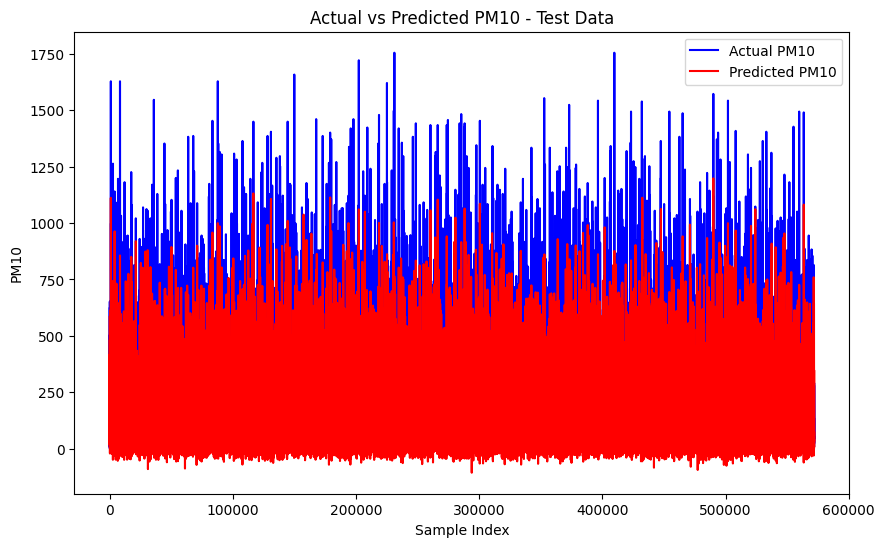

['/content/scalers/scaler_PM10.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'PM10', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot the distribution of AQI before removing outliers
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)  # Subplot 1: Before removing outliers
# sns.boxplot(x=df['AQI'])
# plt.title('Before Removing Outliers')

# # Step 2: Remove Outliers (Already provided in your code)
# Q1 = df['AQI'].quantile(0.35)
# Q3 = df['AQI'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# df_filtered = df[(df['AQI'] >= lower_bound) & (df['AQI'] <= upper_bound)]
# cap_value = df['AQI'].quantile(0.9)
# df['AQI'] = np.where(df['AQI'] > cap_value, cap_value, df['AQI'])
# Step 3: Plot After Removing Outliers
# plt.subplot(1, 2, 2)  # Subplot 2: After removing outliers
# sns.boxplot(x=df['AQI'])
# plt.title('After Removing Outliers')

# # Show the plots
# plt.tight_layout()
# plt.show()
# #df=df_filtered
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'PM10'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual PM10', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted PM10', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted PM10 - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('PM10')
plt.legend()
plt.show()
model_path = os.path.join('/content/models', 'PM10_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_PM10.pkl')
joblib.dump(scaler, scaler_path)

# **PM2 2.5**

date         0
PM2.5        0
Latitude     0
Longitude    0
dtype: int64
                 date  PM2.5  Latitude  Longitude  month  day  hour  \
0 2023-03-31 19:00:00   19.9   32.0301   71.87921      3   31    19   
1 2023-03-31 20:00:00   17.7   32.0301   71.87921      3   31    20   
2 2023-03-31 21:00:00   16.2   32.0301   71.87921      3   31    21   
3 2023-03-31 22:00:00   14.0   32.0301   71.87921      3   31    22   
4 2023-03-31 23:00:00   13.2   32.0301   71.87921      3   31    23   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.16362525e-01 -4.97937834e-01]
 [-4.31423709e-02  8.93111655e-01  3.43219225e-01  6.01823152e-01
  -3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 13.71614270618787
MAE: 9.517329591634068
R-squared: 0.8579217737338267


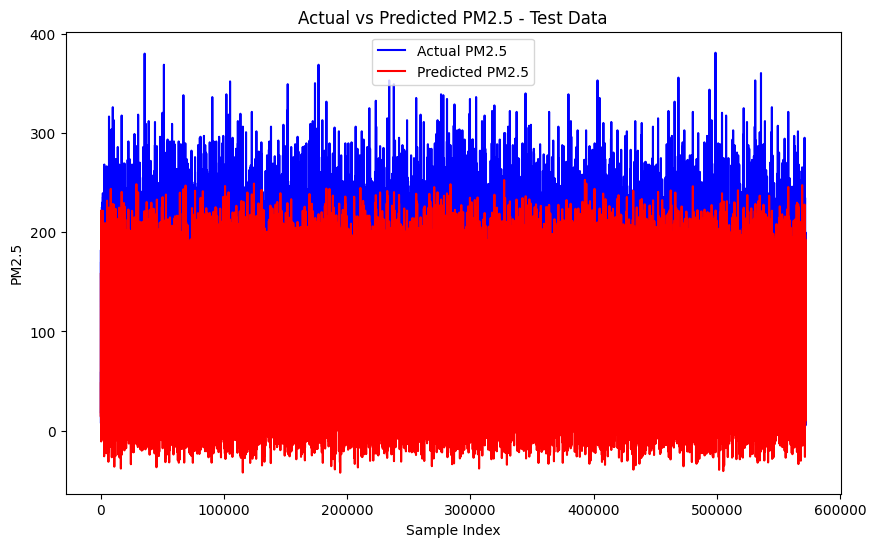

['/content/scalers/scaler_PM2.5.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'PM2.5', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'PM2.5'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual PM2.5', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted PM2.5', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted PM2.5 - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5')
plt.legend()
plt.show()


model_path = os.path.join('/content/models', 'PM2.5_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_PM2.5.pkl')
joblib.dump(scaler, scaler_path)



# **Carbon Monoxide**

date               0
Carbon Monoxide    0
Latitude           0
Longitude          0
dtype: int64
                 date  Carbon Monoxide  Latitude  Longitude  month  day  hour  \
0 2023-03-31 19:00:00            317.0   32.0301   71.87921      3   31    19   
1 2023-03-31 20:00:00            308.0   32.0301   71.87921      3   31    20   
2 2023-03-31 21:00:00            294.0   32.0301   71.87921      3   31    21   
3 2023-03-31 22:00:00            278.0   32.0301   71.87921      3   31    22   
4 2023-03-31 23:00:00            270.0   32.0301   71.87921      3   31    23   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.16362525e-01 -4.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 266.8872157675973
MAE: 150.56367411878426
R-squared: 0.8469982917877239


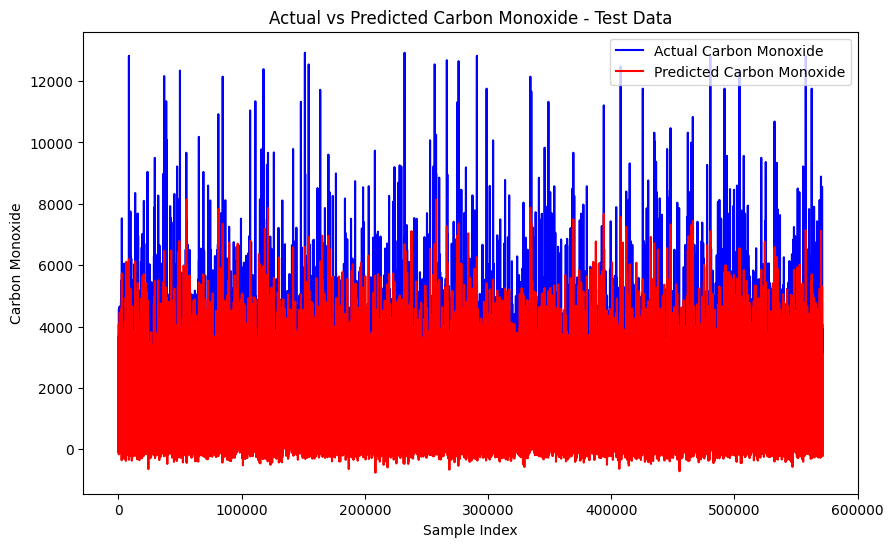

['/content/scalers/scaler_Carbon Monoxide.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'Carbon Monoxide', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'Carbon Monoxide'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Carbon Monoxide', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted Carbon Monoxide', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted Carbon Monoxide - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Carbon Monoxide')
plt.legend()
plt.show()
model_path = os.path.join('/content/models', 'Carbon Monoxide_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_Carbon Monoxide.pkl')
joblib.dump(scaler, scaler_path)



# **Nitrogen Dioxide**

date                0
Nitrogen Dioxide    0
Latitude            0
Longitude           0
dtype: int64
                 date  Nitrogen Dioxide  Latitude  Longitude  month  day  \
0 2023-03-31 19:00:00               5.4   32.0301   71.87921      3   31   
1 2023-03-31 20:00:00               5.0   32.0301   71.87921      3   31   
2 2023-03-31 21:00:00               4.3   32.0301   71.87921      3   31   
3 2023-03-31 22:00:00               3.4   32.0301   71.87921      3   31   
4 2023-03-31 23:00:00               2.7   32.0301   71.87921      3   31   

   hour  day_of_week  
0    19            4  
1    20            4  
2    21            4  
3    22            4  
4    23            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.163625

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 8.248103053502849
MAE: 4.77750704377406
R-squared: 0.7556298688676097


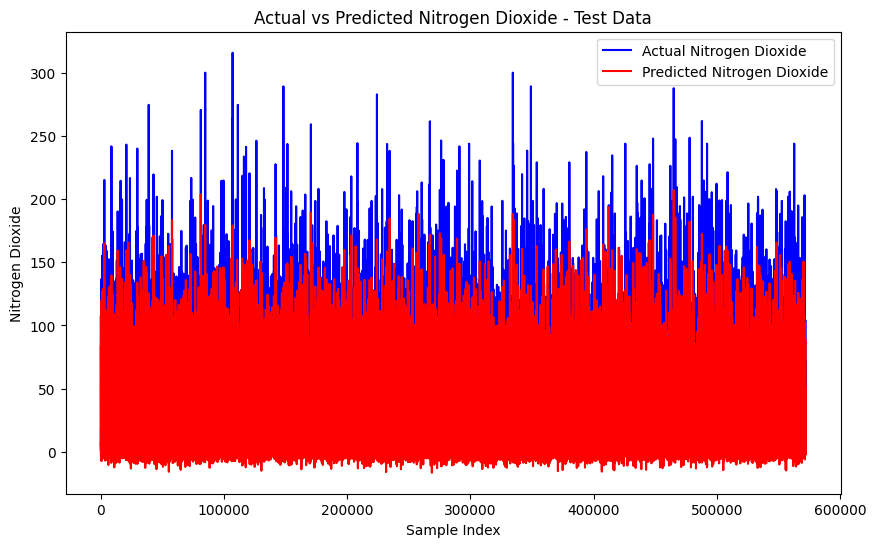

['/content/scalers/Nitrogen Dioxide.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'Nitrogen Dioxide', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'Nitrogen Dioxide'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Nitrogen Dioxide', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted Nitrogen Dioxide', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted Nitrogen Dioxide - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Nitrogen Dioxide')
plt.legend()
plt.show()
model_path = os.path.join('/content/models', 'Nitrogen Dioxide_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_Nitrogen Dioxide.pkl')
joblib.dump(scaler, scaler_path)



# **Sulphur Dioxide**

date               0
Sulphur Dioxide    0
Latitude           0
Longitude          0
dtype: int64
                 date  Sulphur Dioxide  Latitude  Longitude  month  day  hour  \
0 2023-03-31 19:00:00              1.4   32.0301   71.87921      3   31    19   
1 2023-03-31 20:00:00              1.6   32.0301   71.87921      3   31    20   
2 2023-03-31 21:00:00              1.8   32.0301   71.87921      3   31    21   
3 2023-03-31 22:00:00              2.0   32.0301   71.87921      3   31    22   
4 2023-03-31 23:00:00              1.9   32.0301   71.87921      3   31    23   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.16362525e-01 -4.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 4.862559812338701
MAE: 2.7870183031083418
R-squared: 0.6960176707151762


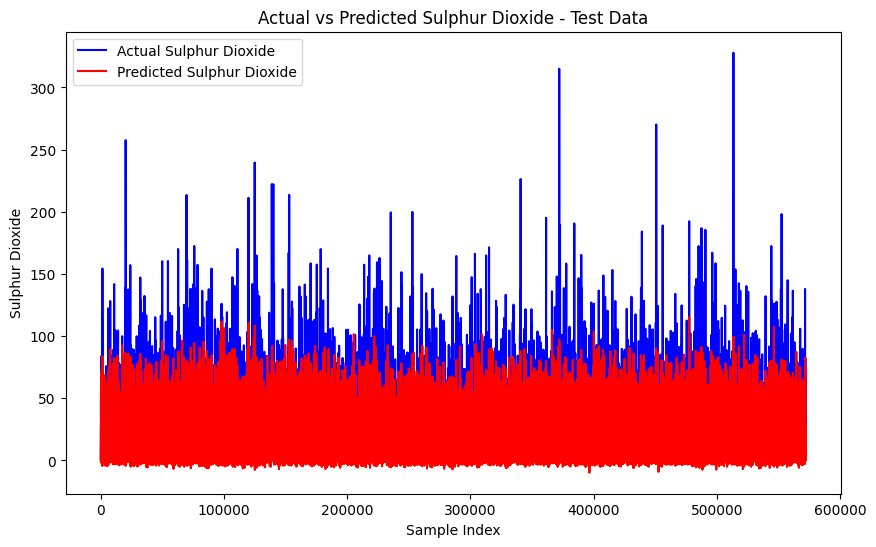

['/content/scalers/Sulphur Dioxide.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'Sulphur Dioxide', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'Sulphur Dioxide'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sulphur Dioxide', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted Sulphur Dioxide', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted Sulphur Dioxide - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Sulphur Dioxide')
plt.legend()
plt.show()
model_path = os.path.join('/content/models', 'Sulphur Dioxide_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_Sulphur Dioxide.pkl')
joblib.dump(scaler, scaler_path)



# **Ozone**

date         0
Ozone        0
Latitude     0
Longitude    0
dtype: int64
                 date  Ozone  Latitude  Longitude  month  day  hour  \
0 2023-03-31 19:00:00   38.0   32.0301   71.87921      3   31    19   
1 2023-03-31 20:00:00   44.0   32.0301   71.87921      3   31    20   
2 2023-03-31 21:00:00   52.0   32.0301   71.87921      3   31    21   
3 2023-03-31 22:00:00   65.0   32.0301   71.87921      3   31    22   
4 2023-03-31 23:00:00   75.0   32.0301   71.87921      3   31    23   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.16362525e-01 -4.97937834e-01]
 [-4.31423709e-02  8.93111655e-01  3.43219225e-01  6.01823152e-01
  -3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 14.208473462025909
MAE: 10.915159465165647
R-squared: 0.8880297067906525


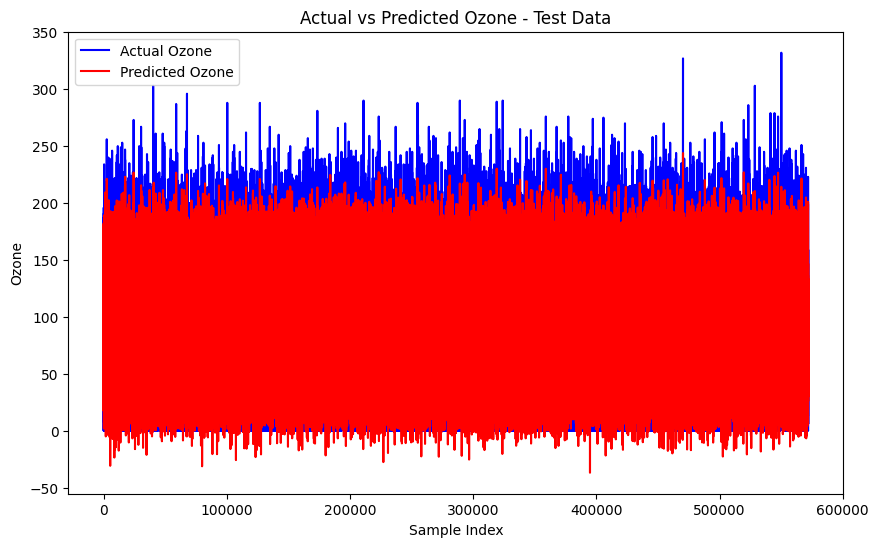

['/content/scalers/Ozone.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'Ozone', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'Ozone'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Ozone', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted Ozone', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted Ozone - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Ozone')
plt.legend()
plt.show()
model_path = os.path.join('/content/models', 'Ozone_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_Ozone.pkl')
joblib.dump(scaler, scaler_path)



**Dust**

date         0
Dust         0
Latitude     0
Longitude    0
dtype: int64
                 date  Dust  Latitude  Longitude  month  day  hour  \
0 2023-03-31 19:00:00   2.0   32.0301   71.87921      3   31    19   
1 2023-03-31 20:00:00   2.0   32.0301   71.87921      3   31    20   
2 2023-03-31 21:00:00   3.0   32.0301   71.87921      3   31    21   
3 2023-03-31 22:00:00   4.0   32.0301   71.87921      3   31    22   
4 2023-03-31 23:00:00   4.0   32.0301   71.87921      3   31    23   

   day_of_week  
0            4  
1            4  
2            4  
3            4  
4            4  
(2287668, 6) (571917, 6)
[[ 6.74957710e-01  1.94891190e+00  6.18963894e-01 -6.49041083e-01
   1.37215726e+00  1.28314921e-03]
 [-1.03869141e+00 -1.07675489e+00 -1.03550412e+00  7.15538083e-01
   1.37215726e+00  1.28314921e-03]
 [ 6.76656045e-02 -7.07678890e-02 -1.03550412e+00  6.01823152e-01
   2.16362525e-01 -4.97937834e-01]
 [-4.31423709e-02  8.93111655e-01  3.43219225e-01  6.01823152e-01
  -3.61534

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 78.6278153053049
MAE: 34.07946632057267
R-squared: 0.7845953684055021


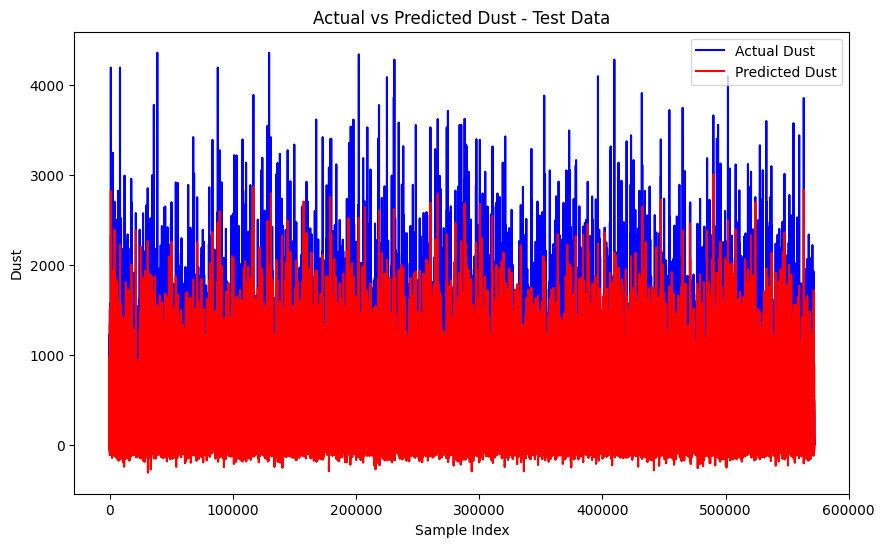

['/content/scalers/Dust.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBRegressor
df= pd.read_csv('/content/drive/MyDrive/Aqi_Dataset/merged_pollutants_with_aqi.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'Dust', 'Latitude','Longitude']]
# Check the sorted dataset
df.head()

print(df.isnull().sum())
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df = df.dropna()
df.shape
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

features = ['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']
target = 'Dust'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])
with tf.device('/device:GPU:0'):

  # Initialize the XGBoost model
  model = XGBRegressor(objective='reg:squarederror',
                      n_estimators=700,
                      learning_rate=0.2,
                      alpha=1.0,         # L1 regularization
                      reg_lambda=1.0,    # L2 regularization
                      max_depth=6,       # Adjust max_depth
                      subsample=0.8,     # Control overfitting
                      colsample_bytree=0.8, # Control overfitting
                      random_state=42)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print(f'RMSE: {rmse}')
  print(f'MAE: {mae}')
  print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Dust', color='blue')  # Actual values from test set
plt.plot(y_pred, label='Predicted Dust', color='red')       # Predicted values from the model
plt.title('Actual vs Predicted Dust - Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Dust')
plt.legend()
plt.show()
model_path = os.path.join('/content/models', 'Dust_model.pkl')
joblib.dump(model, model_path)
scaler_path = os.path.join('/content/scalers', 'scaler_Dust.pkl')
joblib.dump(scaler, scaler_path)



## Parallel Execution

In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from typing import Tuple

# Function to perform forecasting for a single pollutant
def forecast_pollutant(pollutant: str, latitude: float, longitude: float, start_date: str = None, period: int = 60) -> pd.DataFrame:
    # Set the default start date to the current date if not provided
    if start_date is None:
        start_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Load the saved model and scaler for the pollutant
    model_path = os.path.join('/content/models', f'{pollutant}_model.pkl')
    scaler_path = os.path.join('/content/scalers', f'scaler_{pollutant}.pkl')

    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # Convert the start date to a datetime object
    start_date = pd.to_datetime(start_date)

    # Create future date range for the next 'period' days (hourly data)
    future_dates = pd.date_range(start=start_date, periods=24 * period, freq='H')

    # Prepare the future data frame with latitude and longitude
    future_data = pd.DataFrame({
        'date': future_dates,
        'Latitude': [latitude] * len(future_dates),
        'Longitude': [longitude] * len(future_dates),
    })

    # Extract time features
    future_data['month'] = future_data['date'].dt.month
    future_data['day'] = future_data['date'].dt.day
    future_data['hour'] = future_data['date'].dt.hour
    future_data['day_of_week'] = future_data['date'].dt.dayofweek

    # Select relevant features for scaling
    X_future = future_data[['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']]

    # Scale the future data
    X_future_scaled = scaler.transform(X_future)

    # Make predictions
    future_predictions = model.predict(X_future_scaled)

    # Add the predictions to the DataFrame
    future_data[f'predicted_{pollutant}'] = future_predictions

    # Return the DataFrame with the predictions
    return future_data[['date', f'predicted_{pollutant}']]

# Function to run forecasts in parallel for all pollutants and store them
def parallel_forecast(latitude: float, longitude: float, start_date: str = None, period: int = 60) -> pd.DataFrame:
    pollutants = ['PM10', 'PM2.5', 'Carbon Monoxide', 'Nitrogen Dioxide', 'Sulphur Dioxide', 'Ozone', 'Dust', 'AQI']
    combined_forecast_df = pd.DataFrame()

    # Use ThreadPoolExecutor for parallel execution
    with ThreadPoolExecutor() as executor:
        future_to_pollutant = {executor.submit(forecast_pollutant, pollutant, latitude, longitude, start_date, period): pollutant for pollutant in pollutants}

        # Collect the forecast DataFrames as they complete
        for future in future_to_pollutant:
            pollutant = future_to_pollutant[future]
            try:
                pollutant_forecast_df = future.result()
                if combined_forecast_df.empty:
                    combined_forecast_df = pollutant_forecast_df  # Start with the first forecast
                else:
                    # Ensure all pollutants are merged correctly into a single DataFrame
                    combined_forecast_df = pd.merge(combined_forecast_df, pollutant_forecast_df, on='date', how='outer')
            except Exception as exc:
                print(f'{pollutant} generated an exception: {exc}')

    # Return the combined DataFrame with forecasts for all pollutants
    return combined_forecast_df

# Plot function for the forecasted pollutants and AQI
def plot_forecast(forecast_df: pd.DataFrame):
    plt.figure(figsize=(12, 8))
    for column in forecast_df.columns:
        if column != 'date':  # Exclude the date column from plotting
            plt.plot(forecast_df['date'], forecast_df[column], label=column)

    plt.title('Predicted Pollutants and AQI for the Next Period')
    plt.xlabel('Date')
    plt.ylabel('Pollutant / AQI Levels')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend to avoid overlap
    plt.tight_layout()
    plt.show()


<ipython-input-192-940ed6791dde>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=start_date, periods=24 * period, freq='H')
<ipython-input-192-940ed6791dde>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=start_date, periods=24 * period, freq='H')
<ipython-input-192-940ed6791dde>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=start_date, periods=24 * period, freq='H')
<ipython-input-192-940ed6791dde>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=start_date, periods=24 * period, freq='H')
<ipython-input-192-940ed6791dde>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fut

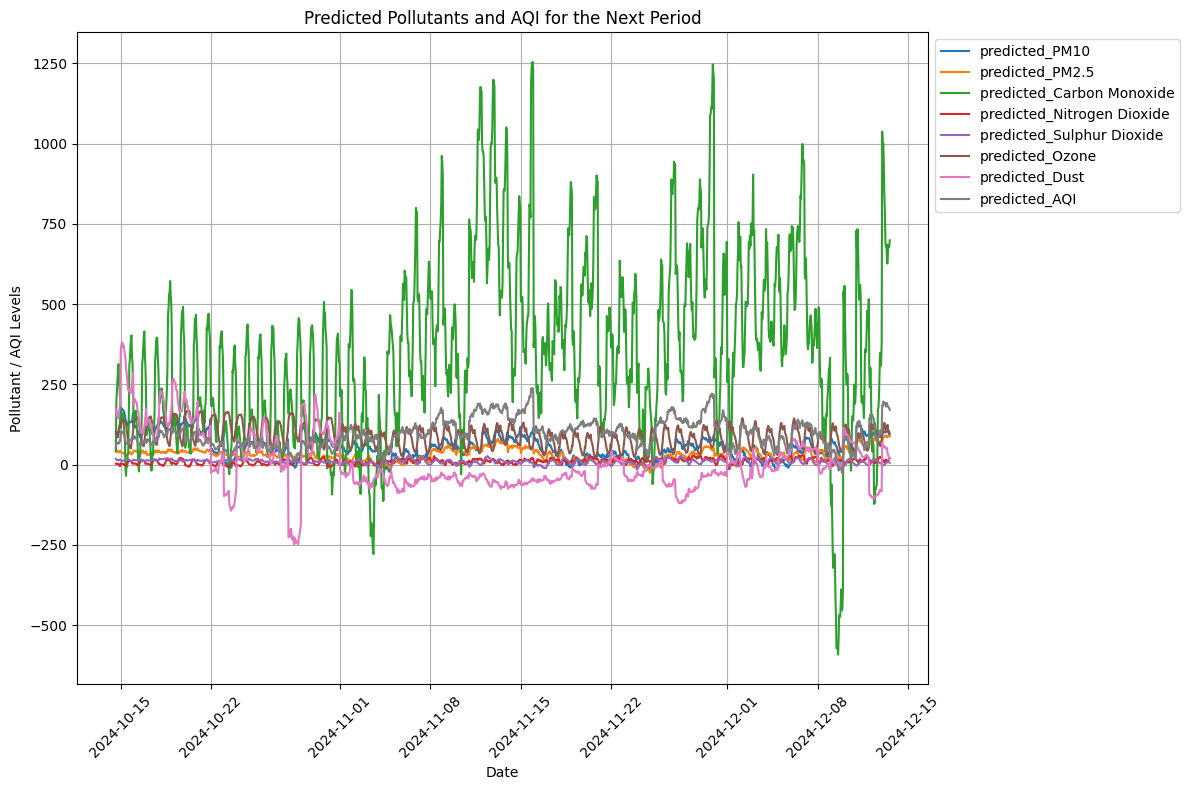

                 date  predicted_PM10  predicted_PM2.5  \
0 2024-10-14 15:15:33       97.313339        41.562546   
1 2024-10-14 16:15:33      101.671638        43.208950   
2 2024-10-14 17:15:33       96.457634        44.195461   
3 2024-10-14 18:15:33       95.721321        43.593540   
4 2024-10-14 19:15:33      102.343536        37.842457   

   predicted_Carbon Monoxide  predicted_Nitrogen Dioxide  \
0                  41.278671                    3.146648   
1                 202.211548                    3.217736   
2                 225.410080                    1.726790   
3                 264.297424                    2.460576   
4                 295.001709                    2.823977   

   predicted_Sulphur Dioxide  predicted_Ozone  predicted_Dust  predicted_AQI  
0                  18.113113       101.497513      172.476273      52.533340  
1                  15.777190        93.063469      168.244873      64.788406  
2                  15.059069        91.014320      15

In [ ]:
# Example usage: Run forecast for a given latitude and longitude for 60 days (default)
forecast_results = parallel_forecast(latitude=40.0, longitude=30.0, start_date=None, period=60)

# Plot the forecasted values for all pollutants
plot_forecast(forecast_results)

# Check the forecasted values DataFrame
print(forecast_results.head())


In [ ]:
import shutil

# Zip the models and scalers folders
shutil.make_archive('models', 'zip', 'models')  # Zips the 'models' folder
shutil.make_archive('scalers', 'zip', 'scalers')  # Zips the 'scalers' folder
from google.colab import files

# Download the zipped folders
files.download('models.zip')
files.download('scalers.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import joblib
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime
import matplotlib.pyplot as plt
from io import BytesIO
import base64

app = Flask(__name__)

# Function to perform forecasting for a single pollutant
def forecast_pollutant(pollutant: str, latitude: float, longitude: float, start_date: str = None, period: int = 60) -> pd.DataFrame:
    # Set default start date if not provided
    if start_date is None:
        start_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Load the saved model and scaler for the pollutant
    model_path = os.path.join('models', f'{pollutant}_model.pkl')
    scaler_path = os.path.join('scalers', f'scaler_{pollutant}.pkl')

    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # Convert the start date to a datetime object
    start_date = pd.to_datetime(start_date)

    # Create future date range for the next 'period' days (hourly data)
    future_dates = pd.date_range(start=start_date, periods=24 * period, freq='H')

    # Prepare the future data frame with latitude and longitude
    future_data = pd.DataFrame({
        'date': future_dates,
        'Latitude': [latitude] * len(future_dates),
        'Longitude': [longitude] * len(future_dates),
    })

    # Extract time features
    future_data['month'] = future_data['date'].dt.month
    future_data['day'] = future_data['date'].dt.day
    future_data['hour'] = future_data['date'].dt.hour
    future_data['day_of_week'] = future_data['date'].dt.dayofweek

    # Select relevant features for scaling
    X_future = future_data[['Latitude', 'Longitude', 'month', 'day', 'hour', 'day_of_week']]

    # Scale the future data
    X_future_scaled = scaler.transform(X_future)

    # Make predictions
    future_predictions = model.predict(X_future_scaled)

    # Add the predictions to the DataFrame
    future_data[f'predicted_{pollutant}'] = future_predictions

    # Return the DataFrame with the predictions
    return future_data[['date', f'predicted_{pollutant}']]

# Function to run forecasts in parallel for all pollutants and store them
def parallel_forecast(latitude: float, longitude: float, start_date: str = None, period: int = 60) -> pd.DataFrame:
    pollutants = ['PM10', 'PM2.5', 'Carbon Monoxide', 'Nitrogen Dioxide', 'Sulphur Dioxide', 'Ozone', 'Dust', 'AQI']
    combined_forecast_df = pd.DataFrame()

    # Use ThreadPoolExecutor for parallel execution
    with ThreadPoolExecutor() as executor:
        future_to_pollutant = {executor.submit(forecast_pollutant, pollutant, latitude, longitude, start_date, period): pollutant for pollutant in pollutants}

        # Collect the forecast DataFrames as they complete
        for future in future_to_pollutant:
            pollutant = future_to_pollutant[future]
            try:
                pollutant_forecast_df = future.result()
                if combined_forecast_df.empty:
                    combined_forecast_df = pollutant_forecast_df  # Start with the first forecast
                else:
                    # Ensure all pollutants are merged correctly into a single DataFrame
                    combined_forecast_df = pd.merge(combined_forecast_df, pollutant_forecast_df, on='date', how='outer')
            except Exception as exc:
                print(f'{pollutant} generated an exception: {exc}')

    # Return the combined DataFrame with forecasts for all pollutants
    return combined_forecast_df

# Plot function for the forecasted pollutants and AQI
def plot_forecast(forecast_df: pd.DataFrame):
    plt.figure(figsize=(12, 8))
    for column in forecast_df.columns:
        if column != 'date':  # Exclude the date column from plotting
            plt.plot(forecast_df['date'], forecast_df[column], label=column)

    plt.title('Predicted Pollutants and AQI for the Next Period')
    plt.xlabel('Date')
    plt.ylabel('Pollutant / AQI Levels')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend to avoid overlap
    plt.tight_layout()

    # Save the plot as a PNG image and return it as a base64-encoded string
    buffer = BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    buffer.close()
    plt.close()
    return img_base64

# API route to handle forecasting requests
@app.route('/forecast', methods=['GET'])
def forecast():
    try:
        latitude = float(request.args.get('latitude'))
        longitude = float(request.args.get('longitude'))
        start_date = request.args.get('start_date', None)  # Optional
        period = int(request.args.get('period', 60))  # Default to 60 days if not provided

        # Perform parallel forecasting
        forecast_results = parallel_forecast(latitude, longitude, start_date, period)

        # Plot the forecast and get the base64-encoded image
        plot_image = plot_forecast(forecast_results)

        # Convert forecast results to a list of dicts for easy JSON serialization
        forecast_data = forecast_results.to_dict(orient='records')

        # Return the forecast data and plot image
        return jsonify({
            'forecast_data': forecast_data,
            'forecast_plot': plot_image
        })

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!pip install flask
!pip install pyngrok
